Load the wine quality dataset https://archive.ics.uci.edu/
dataset/109/wine. The dataset is continuous and therefore discretization would
be required to build the network. You can explore continuous/hybrid models also.
Build classification model based on class variable in the data for performance evalua-
tion (accuracy) https://scikit-learn.org/stable/modules/generated/sklearn.metrics.
accuracy score.html of the network. You can use any available open-source pack-
ages to build the network, example bnlearn package {https://pypi.org/project/
bnlearn/}.

In [1]:
# Here I am importing the dataset 
import pandas as pd
data = pd.read_csv("wine.csv")
data

,target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [2]:
# This cell involves the preprocessing of the dataset
# For preprocessing, I am normalizing the dataset by using the MinMaxScaler tool library

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

normalize_columns = ['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

data[normalize_columns] = scaler.fit_transform(data[normalize_columns])

print(data)


     target   Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
0         1  0.842105    0.191700  0.572193           0.257732   0.619565   
1         1  0.571053    0.205534  0.417112           0.030928   0.326087   
2         1  0.560526    0.320158  0.700535           0.412371   0.336957   
3         1  0.878947    0.239130  0.609626           0.319588   0.467391   
4         1  0.581579    0.365613  0.807487           0.536082   0.521739   
..      ...       ...         ...       ...                ...        ...   
173       3  0.705263    0.970356  0.582888           0.510309   0.271739   
174       3  0.623684    0.626482  0.598930           0.639175   0.347826   
175       3  0.589474    0.699605  0.481283           0.484536   0.543478   
176       3  0.563158    0.365613  0.540107           0.484536   0.543478   
177       3  0.815789    0.664032  0.737968           0.716495   0.282609   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0 

In [3]:
# In this cell, I am making the dataset discrete since it has continious values due to which, if I try to make a bayesian network, 
# it will give with no edges to make a network

columns_to_discretize = ['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
for col in columns_to_discretize:
    data[col] = pd.cut(data[col], bins=3)

(b) Instructions to Construct the network: You will need to construct and evaluate a
total of three networks A, B and C as described below:

• (2 mark) Construct a Bayesian network (A) for the data. Visualise the network
and the probability distribution. Describe a few examples of parent and child
nodes.

In [4]:
# This cell is making the first (A) bayesian network using the prepared dataset which has now been normalized and discretized.
# I am using the method type "hc" (hill climbing) and score type "bic" as mentioned in the bnlearn documentation

import bnlearn as bn
structure = bn.structure_learning.fit(data, methodtype='hc', scoretype='bic')
parameter = bn.parameter_learning.fit(structure, data)

[bnlearn] >Warning: Computing DAG with 14 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of target:
+------------------------------+-----+
| OD280/OD315 of diluted wines | ... |
+------------------------------+-----+
| target(1)                    | ... |
+------------------------------+-----+
| target(2)                    | ... |
+------------------------------+-----+
| target(3)                    | ... |
+------------------------------+-----+
[bnlearn] >CPD of Alcohol:
+--------------------------+-----+--------------------+
| target                   | ... | target(3)          |
+--------------------------+-----+--------------------+
| Al

In [5]:
print(structure)

{'model': <pgmpy.base.DAG.DAG object at 0x0000020E62061410>, 'model_edges': [('target', 'Flavanoids'), ('target', 'Proline'), ('target', 'Hue'), ('target', 'Alcohol'), ('target', 'Color intensity'), ('target', 'Malic acid'), ('target', 'Alcalinity of ash'), ('target', 'Magnesium'), ('target', 'Ash'), ('Alcalinity of ash', 'Ash'), ('Flavanoids', 'Total phenols'), ('Flavanoids', 'Proanthocyanins'), ('Flavanoids', 'Nonflavanoid phenols'), ('OD280/OD315 of diluted wines', 'target')], 'adjmat': target                        target  Alcohol  Malic acid    Ash  \
source                                                             
target                         False     True        True   True   
Alcohol                        False    False       False  False   
Malic acid                     False    False       False  False   
Ash                            False    False       False  False   
Alcalinity of ash              False    False       False   True   
Magnesium                    

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


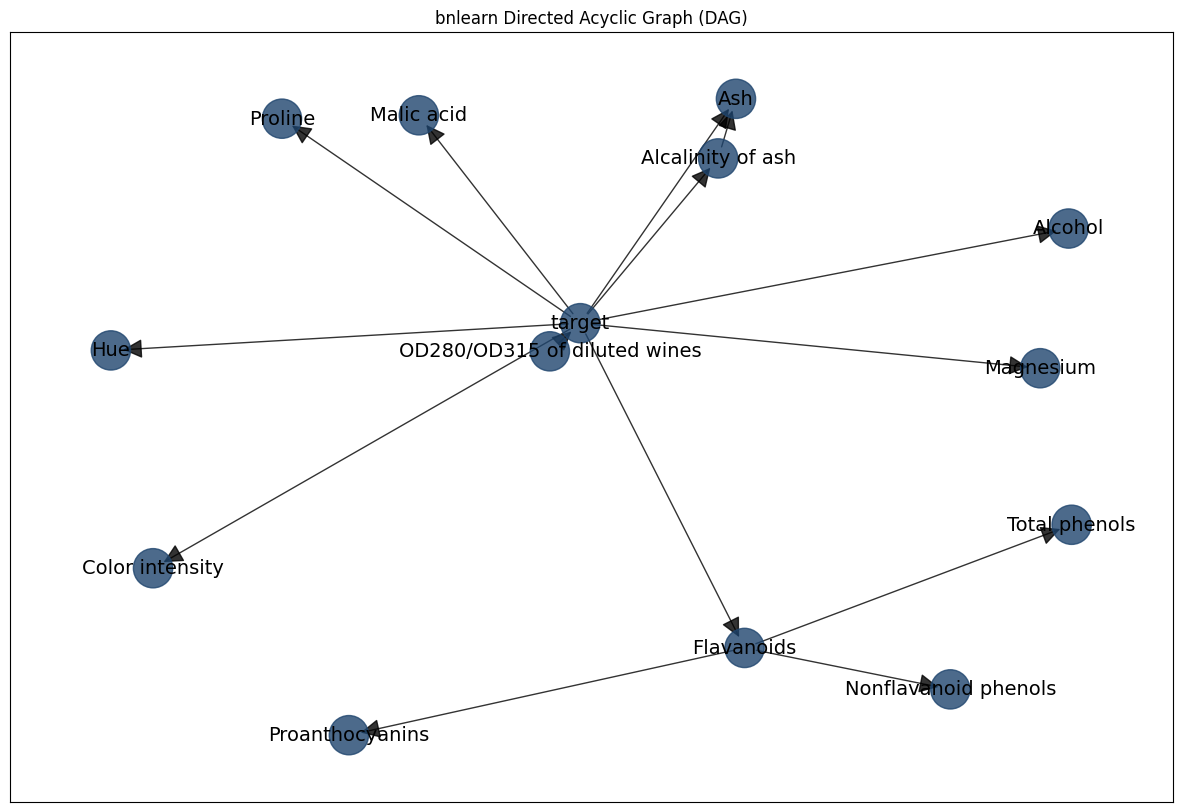

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'target': array([-0.08989707,  0.14030889]),
  'Alcohol': array([0.85683322, 0.38701263]),
  'Malic acid': array([-0.40284773,  0.68214875]),
  'Ash': array([0.21191988, 0.72509649]),
  'Alcalinity of ash': array([0.17740366, 0.56977856]),
  'Magnesium': array([0.80172871, 0.02292553]),
  'Total phenols': array([ 0.86271524, -0.38505868]),
  'Flavanoids': array([ 0.22863614, -0.70606313]),
  'Nonflavanoid phenols': array([ 0.62752563, -0.8140551 ]),
  'Proanthocyanins': array([-0.5385467 , -0.93345368]),
  'Color intensity': array([-0.91826486, -0.49834752]),
  'Hue': array([-1.        ,  0.06938153]),
  'OD280/OD315 of diluted wines': array([-0.14890852,  0.06699409]),
  'Proline': array([-0.6682976 ,  0.67333165])},
 'G': <networkx.classes.digraph.DiGraph at 0x20e620dff10>,
 'node_properties': {'target': {'node_color': '#1f456e', 'node_size': 800},
  'Alcohol': {'node_color': '#1f456e', 

In [6]:
# This is the plot of the graph for the model.
bn.plot(structure)

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


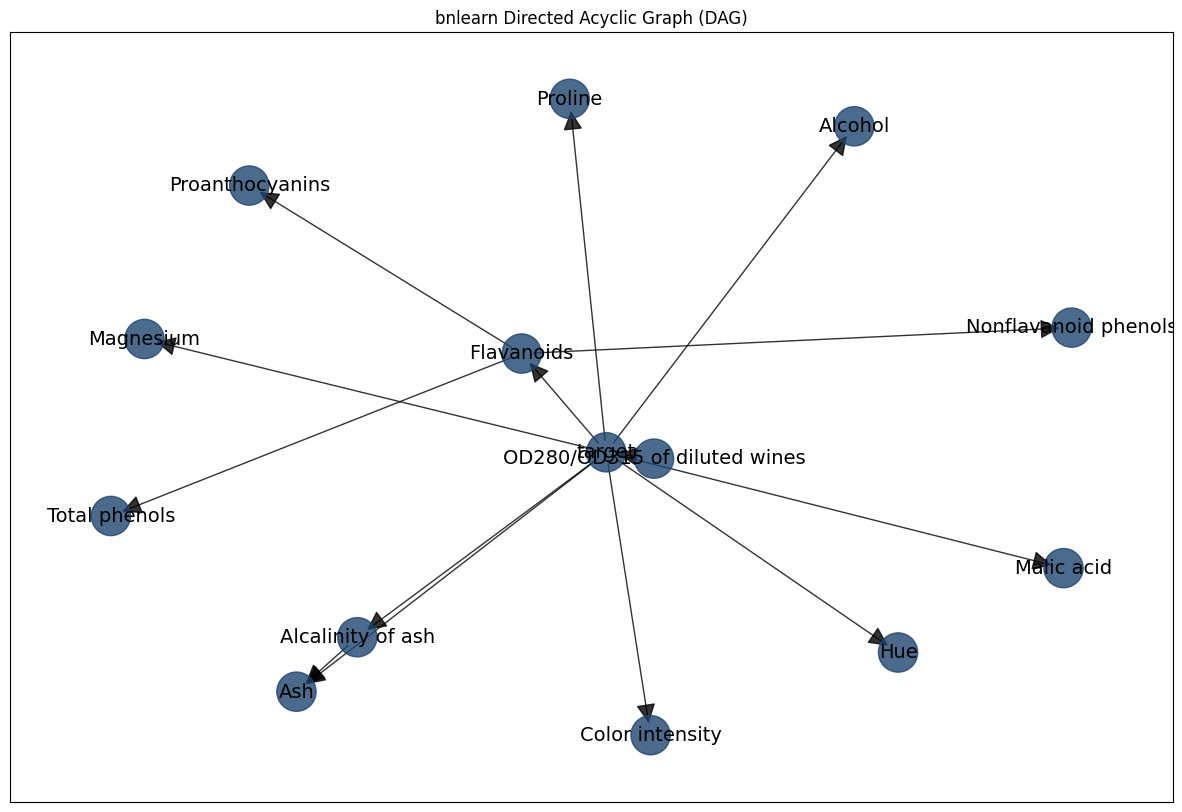

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'target': array([ 0.05829832, -0.03983891]),
  'Alcohol': array([0.51927194, 0.91917149]),
  'Malic acid': array([ 0.90802286, -0.38057351]),
  'Ash': array([-0.51735313, -0.74407094]),
  'Alcalinity of ash': array([-0.40431735, -0.58390155]),
  'Magnesium': array([-0.79971301,  0.29347007]),
  'Total phenols': array([-0.86221454, -0.22720754]),
  'Flavanoids': array([-0.09883962,  0.25062968]),
  'Nonflavanoid phenols': array([0.92309769, 0.32693148]),
  'Proanthocyanins': array([-0.60502013,  0.74482285]),
  'Color intensity': array([ 0.14068919, -0.87205698]),
  'Hue': array([ 0.60058624, -0.62885796]),
  'OD280/OD315 of diluted wines': array([ 0.14708895, -0.05851817]),
  'Proline': array([-0.00959739,  1.        ])},
 'G': <networkx.classes.digraph.DiGraph at 0x20e62057010>,
 'node_properties': {'target': {'node_color': '#1f456e', 'node_size': 800},
  'Alcohol': {'node_color': '#1f456

In [7]:
# This is the plot of the graph of the model after parameter learning
bn.plot(parameter)

From the above graph, we can see the parent and child relationship between the nodes.

Parent  -   Child

1. Flavanoids - Total Phenols
2. target - Alcohol
3. Aclalinity of ash - ash
4. target - Color Intensity

In [8]:
# Now I am using the model to make predictions for the class variable

prediction_A = bn.predict(parameter,data,"target")

[bnlearn]> Remaining columns for inference: 13


100%|██████████| 170/170 [00:00<00:00, 179.01it/s]


In [9]:
print(prediction_A)

     target         p
0         1  0.792624
1         1  0.569840
2         1  0.669367
3         1  0.716853
4         2  0.420994
..      ...       ...
173       3  0.651157
174       3  0.673817
175       3  0.669064
176       3  0.684221
177       3  0.678661

[178 rows x 2 columns]


In [10]:
# In this cell, I will calculate the accuracy for this model by comparing the predicted values and the original values of the 
# target variable from the dataset

from sklearn.metrics import accuracy_score
original_values = data['target']
predicted_values = prediction_A['target']

accuracy_A = accuracy_score(original_values, predicted_values)

print(f'Accuracy value for A: {accuracy_A * 100:.2f}%')

Accuracy value for A: 93.82%


(1 mark) Prune the network (A) for better performance on the class variable.
Let the new network be (B). Explain your method of pruning.

In [11]:
# In this cell I am going to prune the branches one by one and calculate accuracy for all of them
#  Then I will choose the bayesian network having the best accuracy


# For that I have made a loop in which I am iterating through all the features and cheching if the model gets improved when one of the 
# features is removed


numerical_cols_all = ['target','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
print(len(numerical_cols_all))


accuracy_B=0
pruned_index=0
for i in range (1,len(numerical_cols_all)):
    numerical_cols_new=[]
    for j in range (0,len(numerical_cols_all)):
        if(j!=i):
            numerical_cols_new.append(numerical_cols_all[j])
            
    new_data = data[numerical_cols_new]
    pruned_structure = bn.structure_learning.fit(new_data, methodtype='hc', scoretype='bds')
    pruned_parameter = bn.parameter_learning.fit(pruned_structure, new_data)

    pruned_predict = bn.predict(pruned_parameter,new_data,'target')

    predicted_values_pruned = pruned_predict['target']

    accuracy = accuracy_score(original_values, predicted_values_pruned)
    accuracy_B = max(accuracy_B,accuracy)
    if(accuracy==accuracy_B):
        pruned_index = i
    
    print(f'Accuracy value: {accuracy * 100:.2f}%')

14
[bnlearn] >Warning: Computing DAG with 13 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bds]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of target:
+------------------------------+-----+
| OD280/OD315 of diluted wines | ... |
+------------------------------+-----+
| target(1)                    | ... |
+------------------------------+-----+
| target(2)                    | ... |
+------------------------------+-----+
| target(3)                    | ... |
+------------------------------+-----+
[bnlearn] >CPD of Malic acid:
+-----------------------------+-----+-----------------------+
| Proline                     | ... | Proline((0.667, 1.0]) |
+-----------------------------+-----+-----

100%|██████████| 167/167 [00:00<00:00, 198.02it/s]


Accuracy value: 93.82%
[bnlearn] >Warning: Computing DAG with 13 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bds]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of target:
+------------------------------+-----+
| OD280/OD315 of diluted wines | ... |
+------------------------------+-----+
| target(1)                    | ... |
+------------------------------+-----+
| target(2)                    | ... |
+------------------------------+-----+
| target(3)                    | ... |
+------------------------------+-----+
[bnlearn] >CPD of Alcohol:
+--------------------------+-----+--------------------+
| target                   | ... | target(3)          |
+--------------------------+-----+---

100%|██████████| 164/164 [00:00<00:00, 246.11it/s]


Accuracy value: 92.13%
[bnlearn] >Warning: Computing DAG with 13 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bds]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of target:
+------------------------------+-----+
| OD280/OD315 of diluted wines | ... |
+------------------------------+-----+
| target(1)                    | ... |
+------------------------------+-----+
| target(2)                    | ... |
+------------------------------+-----+
| target(3)                    | ... |
+------------------------------+-----+
[bnlearn] >CPD of Alcohol:
+--------------------------+-----+--------------------+
| target                   | ... | target(3)          |
+--------------------------+-----+---

100%|██████████| 167/167 [00:00<00:00, 233.68it/s]


Accuracy value: 94.94%
[bnlearn] >Warning: Computing DAG with 13 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bds]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of target:
+------------------------------+-----+
| OD280/OD315 of diluted wines | ... |
+------------------------------+-----+
| target(1)                    | ... |
+------------------------------+-----+
| target(2)                    | ... |
+------------------------------+-----+
| target(3)                    | ... |
+------------------------------+-----+
[bnlearn] >CPD of Alcohol:
+--------------------------+-----+--------------------+
| target                   | ... | target(3)          |
+--------------------------+-----+---

100%|██████████| 166/166 [00:00<00:00, 286.96it/s]


Accuracy value: 94.38%
[bnlearn] >Warning: Computing DAG with 13 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bds]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of target:
+------------------------------+-----+
| OD280/OD315 of diluted wines | ... |
+------------------------------+-----+
| target(1)                    | ... |
+------------------------------+-----+
| target(2)                    | ... |
+------------------------------+-----+
| target(3)                    | ... |
+------------------------------+-----+
[bnlearn] >CPD of Alcohol:
+--------------------------+-----+--------------------+
| target                   | ... | target(3)          |
+--------------------------+-----+---

100%|██████████| 164/164 [00:00<00:00, 244.23it/s]


Accuracy value: 94.38%
[bnlearn] >Warning: Computing DAG with 13 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bds]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of target:
+------------------------------+-----+
| OD280/OD315 of diluted wines | ... |
+------------------------------+-----+
| target(1)                    | ... |
+------------------------------+-----+
| target(2)                    | ... |
+------------------------------+-----+
| target(3)                    | ... |
+------------------------------+-----+
[bnlearn] >CPD of Alcohol:
+--------------------------+-----+--------------------+
| target                   | ... | target(3)          |
+--------------------------+-----+---

100%|██████████| 166/166 [00:00<00:00, 230.57it/s]


Accuracy value: 96.07%
[bnlearn] >Warning: Computing DAG with 13 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bds]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of target:
+------------------------------+-----+
| OD280/OD315 of diluted wines | ... |
+------------------------------+-----+
| target(1)                    | ... |
+------------------------------+-----+
| target(2)                    | ... |
+------------------------------+-----+
| target(3)                    | ... |
+------------------------------+-----+
[bnlearn] >CPD of Alcohol:
+--------------------------+-----+--------------------+
| target                   | ... | target(3)          |
+--------------------------+-----+---

100%|██████████| 167/167 [00:01<00:00, 122.41it/s]


Accuracy value: 92.13%
[bnlearn] >Warning: Computing DAG with 13 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bds]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of target:
+------------------------------+-----+
| OD280/OD315 of diluted wines | ... |
+------------------------------+-----+
| target(1)                    | ... |
+------------------------------+-----+
| target(2)                    | ... |
+------------------------------+-----+
| target(3)                    | ... |
+------------------------------+-----+
[bnlearn] >CPD of Alcohol:
+--------------------------+-----+--------------------+
| target                   | ... | target(3)          |
+--------------------------+-----+---

100%|██████████| 165/165 [00:02<00:00, 79.54it/s]


Accuracy value: 96.07%
[bnlearn] >Warning: Computing DAG with 13 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bds]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of target:
+------------------------------+-----+
| OD280/OD315 of diluted wines | ... |
+------------------------------+-----+
| target(1)                    | ... |
+------------------------------+-----+
| target(2)                    | ... |
+------------------------------+-----+
| target(3)                    | ... |
+------------------------------+-----+
[bnlearn] >CPD of Alcohol:
+--------------------------+-----+--------------------+
| target                   | ... | target(3)          |
+--------------------------+-----+---

100%|██████████| 167/167 [00:02<00:00, 80.10it/s]


Accuracy value: 96.07%
[bnlearn] >Warning: Computing DAG with 13 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bds]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of target:
+------------------------------+-----+
| OD280/OD315 of diluted wines | ... |
+------------------------------+-----+
| target(1)                    | ... |
+------------------------------+-----+
| target(2)                    | ... |
+------------------------------+-----+
| target(3)                    | ... |
+------------------------------+-----+
[bnlearn] >CPD of Alcohol:
+--------------------------+-----+--------------------+
| target                   | ... | target(3)          |
+--------------------------+-----+---

100%|██████████| 161/161 [00:02<00:00, 76.39it/s]


Accuracy value: 92.70%
[bnlearn] >Warning: Computing DAG with 13 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bds]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of target:
+------------------------------+-----+
| OD280/OD315 of diluted wines | ... |
+------------------------------+-----+
| target(1)                    | ... |
+------------------------------+-----+
| target(2)                    | ... |
+------------------------------+-----+
| target(3)                    | ... |
+------------------------------+-----+
[bnlearn] >CPD of Alcohol:
+--------------------------+-----+--------------------+
| target                   | ... | target(3)          |
+--------------------------+-----+---

100%|██████████| 167/167 [00:00<00:00, 231.10it/s]


Accuracy value: 94.94%
[bnlearn] >Warning: Computing DAG with 13 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bds]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of target:
+-----------+----------+
| target(1) | 0.33305  |
+-----------+----------+
| target(2) | 0.343237 |
+-----------+----------+
| target(3) | 0.323713 |
+-----------+----------+
[bnlearn] >CPD of Alcohol:
+--------------------------+-----+--------------------+
| target                   | ... | target(3)          |
+--------------------------+-----+--------------------+
| Alcohol((-0.001, 0.333]) | ... | 0.2992424242424242 |
+--------------------------+-----+--------------------+
| Alcohol((0.333, 0.667])  | ... | 0.38053613

100%|██████████| 165/165 [00:00<00:00, 173.36it/s]


Accuracy value: 92.13%
[bnlearn] >Warning: Computing DAG with 13 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bds]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of target:
+------------------------------+-----+
| OD280/OD315 of diluted wines | ... |
+------------------------------+-----+
| target(1)                    | ... |
+------------------------------+-----+
| target(2)                    | ... |
+------------------------------+-----+
| target(3)                    | ... |
+------------------------------+-----+
[bnlearn] >CPD of Alcohol:
+--------------------------+-----+--------------------+
| target                   | ... | target(3)          |
+--------------------------+-----+---

100%|██████████| 163/163 [00:00<00:00, 271.55it/s]

Accuracy value: 89.89%


In [12]:
# Here we can now see that we have recieved the best result with the following branch pruned. 
# The best accuracy is also mentioned.

print(accuracy_B)
print("Branch Pruned: ")
print(numerical_cols_all[pruned_index])

0.9606741573033708
Branch Pruned: 
Proanthocyanins


(1.5 marks) Use methods other than pruning to construct the best model on
the dataset. Let (A) be the new improved network.

[bnlearn] >Warning: Computing DAG with 14 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bdeu]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of target:
+------------------------------+-----+
| OD280/OD315 of diluted wines | ... |
+------------------------------+-----+
| target(1)                    | ... |
+------------------------------+-----+
| target(2)                    | ... |
+------------------------------+-----+
| target(3)                    | ... |
+------------------------------+-----+
[bnlearn] >CPD of Alcohol:
+--------------------------+-----+--------------------+
| target                   | ... | target(3)          |
+--------------------------+-----+--------------------+
| A

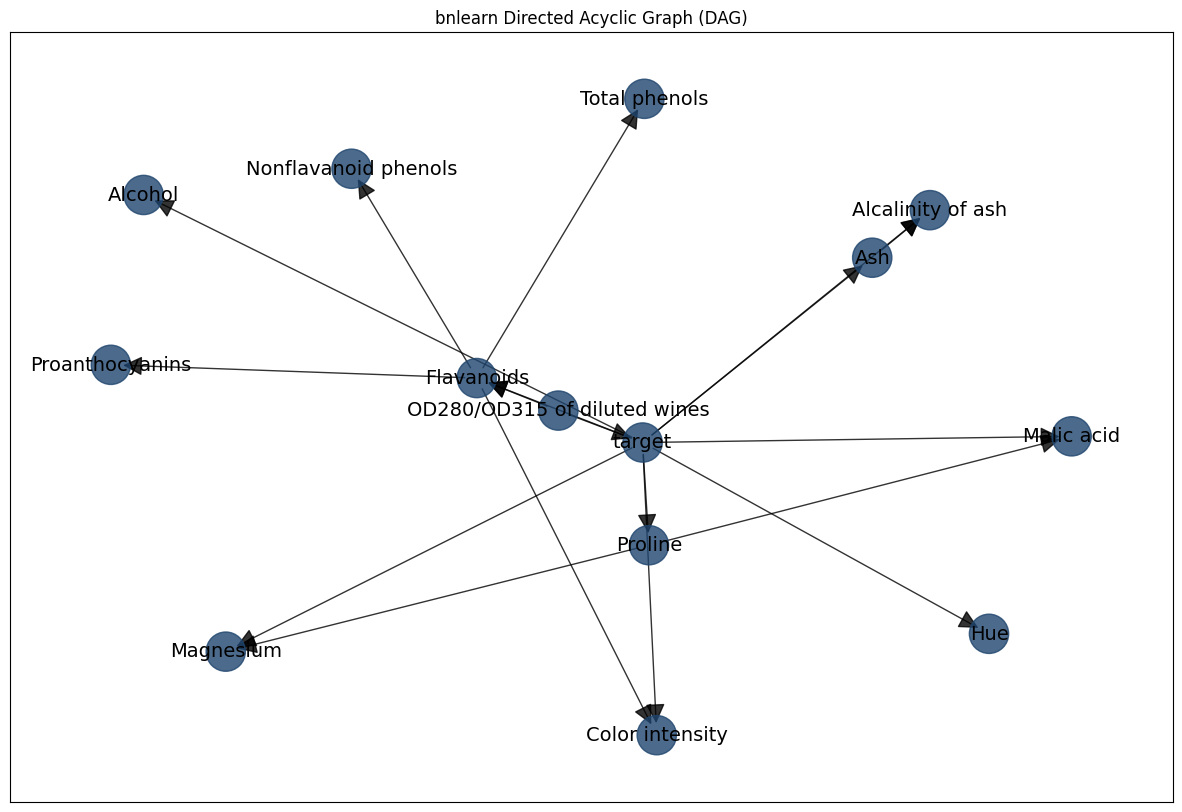

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


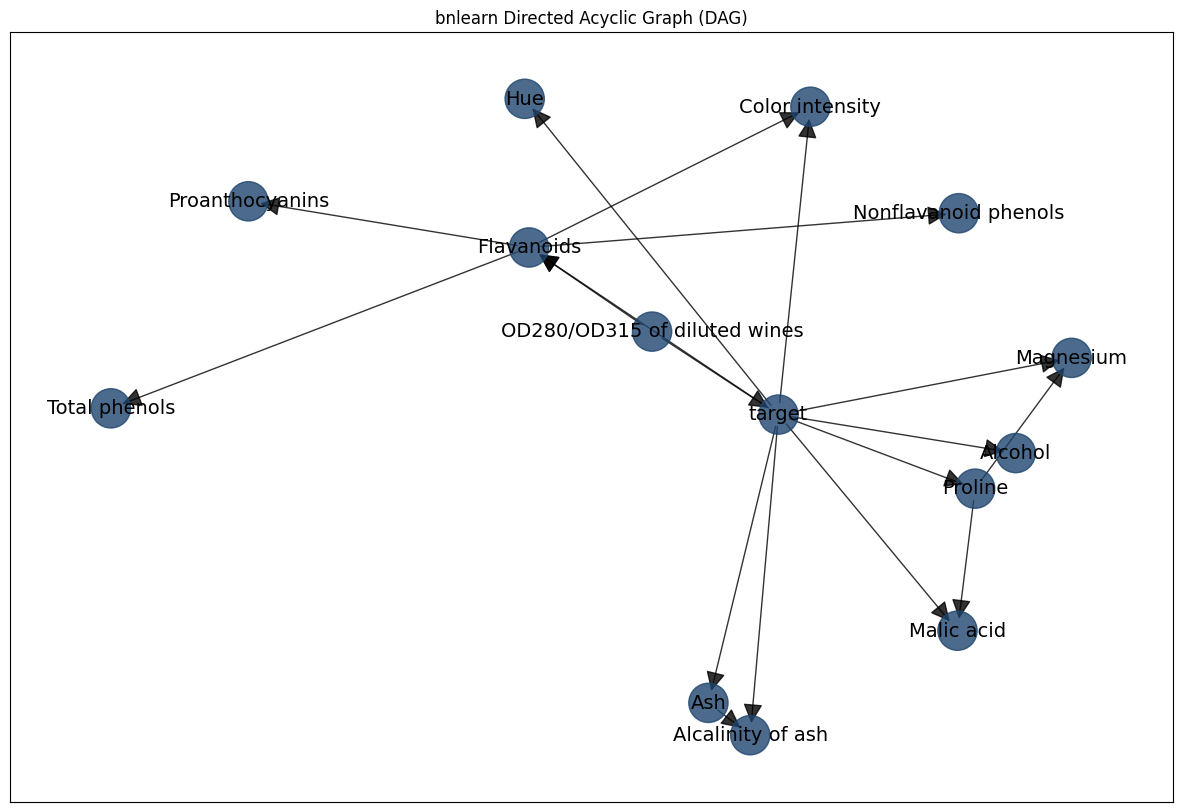

[bnlearn]> Remaining columns for inference: 13


100%|██████████| 170/170 [00:00<00:00, 276.64it/s]

Accuracy value for new A: 95.51%


In [13]:
# This is another method that can improve our model. Here I am changing the scoring technique and getting a better accuracy than before.
structure_new = bn.structure_learning.fit(data, methodtype='hc', scoretype='bdeu')
parameter_new = bn.parameter_learning.fit(structure_new, data)

bn.plot(structure_new)
bn.plot(parameter_new)

prediction_A_new = bn.predict(parameter_new,data,"target")

original_values = data['target']
predicted_values_new = prediction_A_new['target']

accuracy_new = accuracy_score(original_values, predicted_values_new)

print(f'Accuracy value for new A: {accuracy_new * 100:.2f}%')

Use feature selection method {https://scikit-learn.org/stable/modules/
feature selection.html} on the data and construct a Bayesian network on new
data (C). Plot the probability distribution P(class|F1, F2) to F1 and F2 where
F1 and F2 are features that are significant for the class prediction. Describe
the change in probability distribution ?

In [14]:
# In this cell I am preparing the dataset again in case there have been any changes in our old one.

data = pd.read_csv("wine.csv")

scaler = MinMaxScaler()

normalize_cols = ['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

data[normalize_columns] = scaler.fit_transform(data[normalize_columns])
per_column = data.values
columns_to_discretize = ['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

for col in columns_to_discretize:
    data[col] = pd.cut(data[col], bins=3)

In [15]:
# In this cell I am using the feature selection method to select a few features.
# In my solution, I am using the selection of feature on the basis of variance. Here, only features having a high variance value will be selected.
#  The threshold value here is 0.03 after trying different values.
#  This value gives us 11 columns. On increasing it, the number of columns will decrease

from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(0.03))
feature_selection = sel.fit_transform(per_column)
df = pd.DataFrame(feature_selection, columns = data.columns[sel.get_support()])
print(df.columns)
selected_columns = df.columns

Index(['target', 'Alcohol', 'Malic acid', 'Total phenols', 'Flavanoids',
       'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')


In [16]:
new_df = data[selected_columns]

In [17]:
# Now I am making a basian network with the new chosen features

structure_feature_selection = bn.structure_learning.fit(new_df, methodtype='hc', scoretype='bic')
parameter_feature_selection = bn.parameter_learning.fit(structure_feature_selection, new_df)

[bnlearn] >Warning: Computing DAG with 11 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of target:
+------------------------------+-----+
| OD280/OD315 of diluted wines | ... |
+------------------------------+-----+
| target(1)                    | ... |
+------------------------------+-----+
| target(2)                    | ... |
+------------------------------+-----+
| target(3)                    | ... |
+------------------------------+-----+
[bnlearn] >CPD of Alcohol:
+--------------------------+-----+--------------------+
| target                   | ... | target(3)          |
+--------------------------+-----+--------------------+
| Al

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


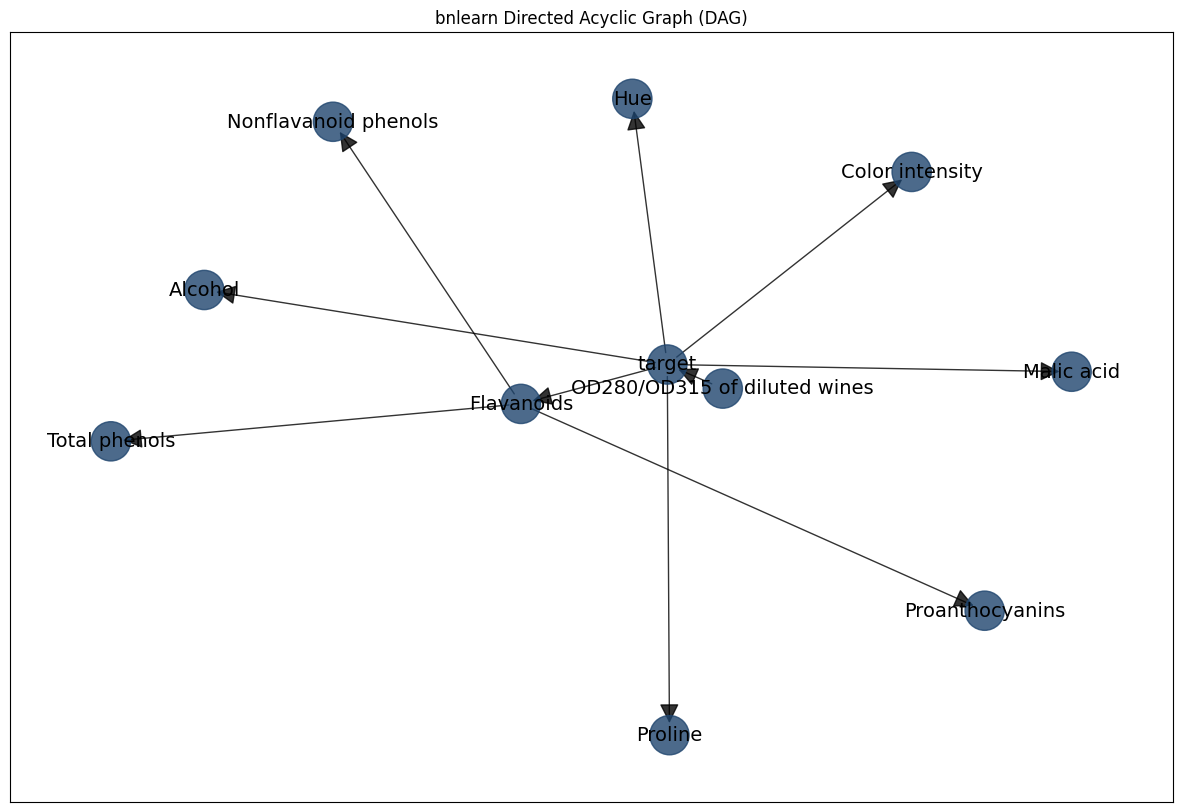

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'target': array([ 0.08177712, -0.00271683]),
  'Alcohol': array([-0.73296115,  0.19777336]),
  'Malic acid': array([ 0.79324255, -0.02217464]),
  'Total phenols': array([-0.89726578, -0.2093903 ]),
  'Flavanoids': array([-0.17572719, -0.10869712]),
  'Nonflavanoid phenols': array([-0.50643109,  0.65035412]),
  'Proanthocyanins': array([ 0.64024386, -0.66508558]),
  'Color intensity': array([0.51179412, 0.51538424]),
  'Hue': array([0.02027408, 0.71208531]),
  'OD280/OD315 of diluted wines': array([ 0.17941358, -0.06753256]),
  'Proline': array([ 0.08563991, -1.        ])},
 'G': <networkx.classes.digraph.DiGraph at 0x20e64b5e850>,
 'node_properties': {'target': {'node_color': '#1f456e', 'node_size': 800},
  'Alcohol': {'node_color': '#1f456e', 'node_size': 800},
  'Malic acid': {'node_color': '#1f456e', 'node_size': 800},
  'Total phenols': {'node_color': '#1f456e', 'node_size': 800},
  'F

In [18]:
bn.plot(parameter_feature_selection)

In [19]:
# Making predictions
feature_selection_prediction = bn.predict(parameter_feature_selection, new_df,'target')

[bnlearn]> Remaining columns for inference: 10


100%|██████████| 152/152 [00:00<00:00, 309.03it/s]


In [20]:
original_values_feature_selection = new_df['target']
predicted_values_feature_selection = feature_selection_prediction['target']

accuracy_C = accuracy_score(original_values_feature_selection, predicted_values_feature_selection)

print(f'Accuracy value with C: {accuracy_C * 100:.2f}%')

Accuracy value with C: 94.38%


Compare the prediction performance based on the three models (A),
(B) and (C).

In [21]:
#  In this cell we will show the performances of the three bayesian networks in terms of their accuracy

print(f'Accuracy value with A: {accuracy_A * 100:.2f}%')
print(f'Accuracy value with B: {accuracy_B * 100:.2f}%')
print(f'Accuracy value with C: {accuracy_C * 100:.2f}%')

Accuracy value with A: 93.82%
Accuracy value with B: 96.07%
Accuracy value with C: 94.38%


Thus, we can see from the above values that accuracy for the model B is the highest.